In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Đọc dữ liệu
# Yêu cầu tải file data,csv về thư mục project
data = pd.read_csv("data.csv", keep_default_na=False)

# Hiển thị tên các cột
columns_list = [[index + 1, column] for index, column in enumerate(data.columns.tolist())]
print("Danh sách các cột trong dữ liệu:")
print(tabulate(columns_list, headers=["STT", "Tên cột"], tablefmt="pretty"))
print()

print("Thông tin thống kê dữ liệu:")
print(data.info())
print("\nThống kê mô tả:")
print(data.describe())
print()

# Xử lý dữ liệu lỗi
print("Kiểm tra giá trị thiếu:")
print(data.isnull().sum())
data = data.dropna()

# Encode các cột phân loại
categorical_cols = [
    "gender",
    "region",
    "income_level",
    "smoking_status",
    "alcohol_consumption",
    "dietary_habits",
    "physical_activity",
    "air_pollution_exposure",
    "stress_level",
    "EKG_results",
]

data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Tách đặc trưng và nhãn
X = data_encoded.drop("heart_attack", axis=1)
y = data_encoded["heart_attack"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Danh sách các cột trong dữ liệu:
+-----+--------------------------------+
| STT |            Tên cột             |
+-----+--------------------------------+
|  1  |              age               |
|  2  |             gender             |
|  3  |             region             |
|  4  |          income_level          |
|  5  |          hypertension          |
|  6  |            diabetes            |
|  7  |       cholesterol_level        |
|  8  |            obesity             |
|  9  |      waist_circumference       |
| 10  |         family_history         |
| 11  |         smoking_status         |
| 12  |      alcohol_consumption       |
| 13  |       physical_activity        |
| 14  |         dietary_habits         |
| 15  |     air_pollution_exposure     |
| 16  |          stress_level          |
| 17  |          sleep_hours           |
| 18  |    blood_pressure_systolic     |
| 19  |    blood_pressure_diastolic    |
| 20  |      fasting_blood_sugar       |
| 21  |        cholester


PCA giữ lại 31 chiều (để giữ lại 95% phương sai).

Phương sai giải thích của PCA:
Component 1: 0.0467
Component 2: 0.0466
Component 3: 0.0466
Component 4: 0.0463
Component 5: 0.0425
Component 6: 0.0405
Component 7: 0.0395
Component 8: 0.0390
Component 9: 0.0388
Component 10: 0.0386
Component 11: 0.0325
Component 12: 0.0311
Component 13: 0.0310
Component 14: 0.0305
Component 15: 0.0304
Component 16: 0.0293
Component 17: 0.0273
Component 18: 0.0236
Component 19: 0.0236
Component 20: 0.0235
Component 21: 0.0234
Component 22: 0.0234
Component 23: 0.0233
Component 24: 0.0233
Component 25: 0.0232
Component 26: 0.0232
Component 27: 0.0231
Component 28: 0.0231
Component 29: 0.0231
Component 30: 0.0230
Component 31: 0.0230
Tổng phương sai giải thích: 0.9630 (95%)


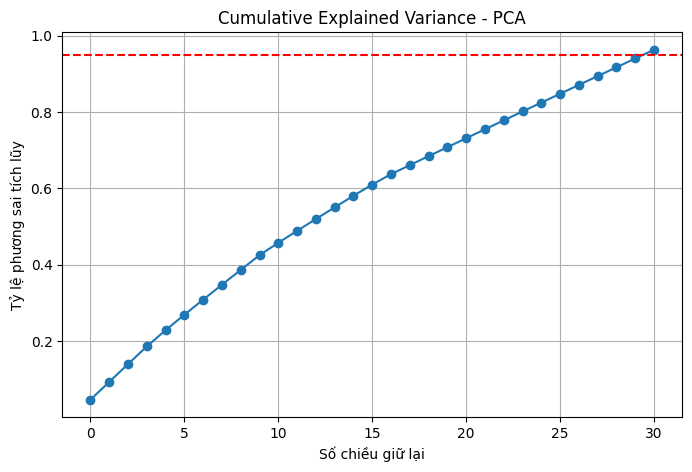

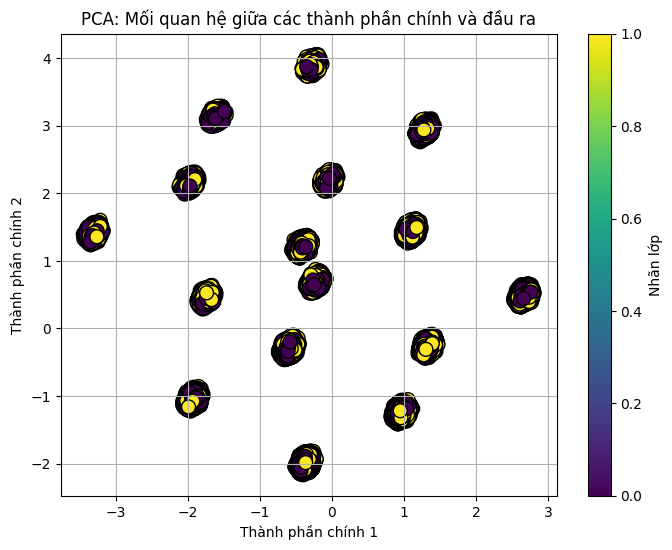


Hệ số tương quan Pearson giữa thành phần PCA 1 và nhãn lớp: 0.0025
Hệ số tương quan Pearson giữa thành phần PCA 2 và nhãn lớp: 0.0039

LDA giảm chiều còn: 1 chiều.

Phương sai giải thích của LDA:
Component 1: 1.0000
Tổng phương sai giải thích: 1.0000


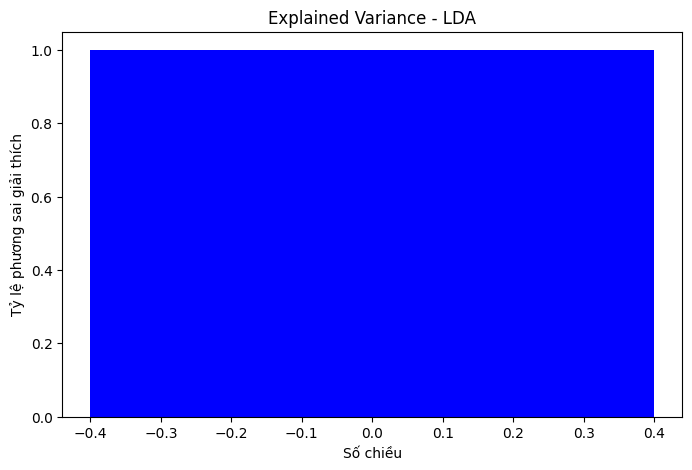

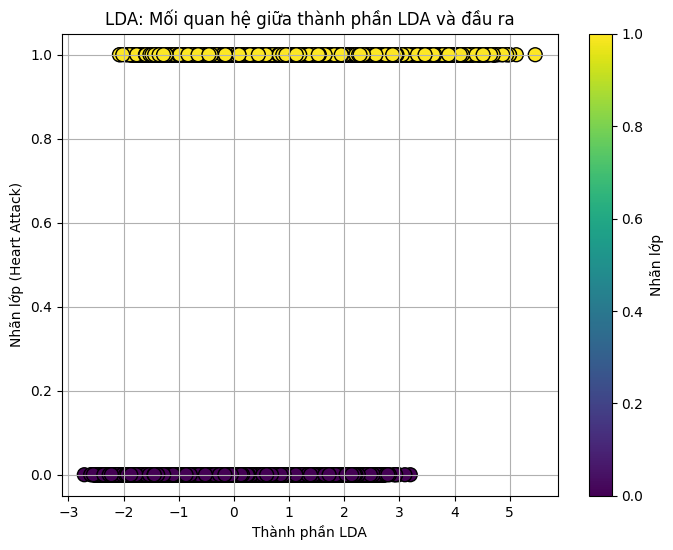


Hệ số tương quan Pearson giữa thành phần LDA và nhãn lớp: 0.5204

So sánh giữa PCA và LDA:
Phương sai giải thích PCA: 0.9630070410387539 (95%)
Phương sai giải thích LDA: 1.0


In [3]:
# Phương pháp PCA
pca = PCA(n_components=0.95)  # Tự động chọn số chiều giữ lại 95% phương sai
X_reduced_PCA = pca.fit_transform(X_scaled)
print(f"\nPCA giữ lại {X_reduced_PCA.shape[1]} chiều (để giữ lại 95% phương sai).")
# Hiển thị phương sai giải thích của PCA
print(f"\nPhương sai giải thích của PCA:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f}")
print(f"Tổng phương sai giải thích: {pca.explained_variance_ratio_.sum():.4f} (95%)")

# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(8, 5))
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Cumulative Explained Variance - PCA")
plt.xlabel("Số chiều giữ lại")
plt.ylabel("Tỷ lệ phương sai tích lũy")
plt.grid(True)
plt.show()

# Trực quan hóa mối quan hệ giữa 2 thành phần chính với đầu ra (y)
plt.figure(figsize=(8, 6))

# Vẽ scatter plot giữa hai thành phần chính đầu tiên và phân loại theo nhãn y
scatter = plt.scatter(X_reduced_PCA[:, 0], X_reduced_PCA[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)

# Thêm tiêu đề và nhãn
plt.title("PCA: Mối quan hệ giữa các thành phần chính và đầu ra")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")

# Thêm thanh màu để thể hiện các nhãn lớp
plt.colorbar(scatter, label='Nhãn lớp')

# Hiển thị đồ thị
plt.grid(True)
plt.show()

# Kiểm tra tương quan tuyến tính giữa thành phần PCA (2 chiều) và nhãn lớp (y)
# Tính hệ số tương quan Pearson giữa mỗi thành phần PCA và nhãn lớp y
correlation_pca1 = np.corrcoef(X_reduced_PCA[:, 0], y)[0, 1]
print(f"\nHệ số tương quan Pearson giữa thành phần PCA 1 và nhãn lớp: {correlation_pca1:.4f}")
correlation_pca2 = np.corrcoef(X_reduced_PCA[:, 1], y)[0, 1]
print(f"Hệ số tương quan Pearson giữa thành phần PCA 2 và nhãn lớp: {correlation_pca2:.4f}")

# Phương pháp LDA
lda = LDA(n_components=1)  # Vì có 2 lớp => tối đa là 1
X_reduced_LDA = lda.fit_transform(X_scaled, y)
print(f"\nLDA giảm chiều còn: {X_reduced_LDA.shape[1]} chiều.")
print(f"\nPhương sai giải thích của LDA:")
for i, var in enumerate(lda.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f}")
print(f"Tổng phương sai giải thích: {lda.explained_variance_ratio_.sum():.4f}")

# Vẽ biểu đồ phương sai tích lũy (LDA chỉ có 1 chiều)
plt.figure(figsize=(8, 5))
explained_variance = lda.explained_variance_ratio_
plt.bar(range(1), explained_variance, color='b')
plt.title("Explained Variance - LDA")
plt.xlabel("Số chiều")
plt.ylabel("Tỷ lệ phương sai giải thích")
plt.show()

plt.figure(figsize=(8, 6))

# Vẽ scatter plot giữa thành phần LDA (1 chiều) và nhãn lớp y
scatter = plt.scatter(X_reduced_LDA, y, c=y, cmap='viridis', edgecolor='k', s=100)

# Thêm tiêu đề và nhãn
plt.title("LDA: Mối quan hệ giữa thành phần LDA và đầu ra")
plt.xlabel("Thành phần LDA")
plt.ylabel("Nhãn lớp (Heart Attack)")

# Thêm thanh màu để thể hiện các nhãn lớp
plt.colorbar(scatter, label='Nhãn lớp')

# Hiển thị đồ thị
plt.grid(True)
plt.show()

# Kiểm tra tương quan tuyến tính giữa thành phần LDA và nhãn lớp (y)
# Tính hệ số tương quan Pearson giữa thành phần LDA và nhãn lớp
correlation_lda = np.corrcoef(X_reduced_LDA.T, y)[0, 1]
print(f"\nHệ số tương quan Pearson giữa thành phần LDA và nhãn lớp: {correlation_lda:.4f}")

## So sánh giữa PCA và LDA
print("\nSo sánh giữa PCA và LDA:")
print(f"Phương sai giải thích PCA: {pca.explained_variance_ratio_.sum()} (95%)")
print(f"Phương sai giải thích LDA: {lda.explained_variance_ratio_.sum()}")

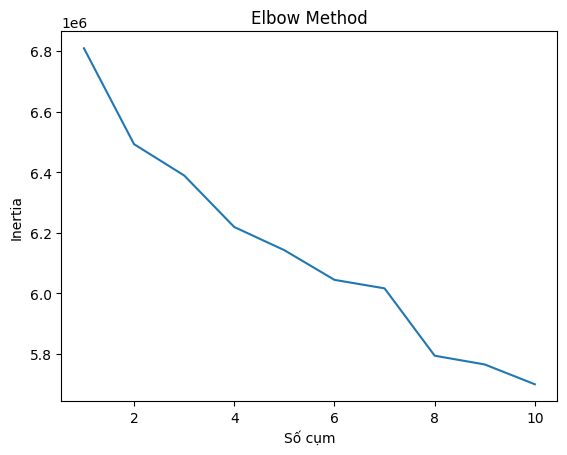

Thuật toán hội tụ sau 17 lần cập nhật.


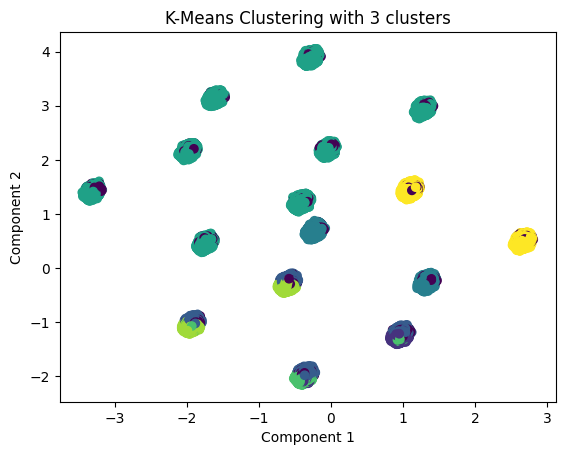


➡️ Tiến hành phân cụm GMM với 3 cụm...
GMM hội tụ sau 2 vòng lặp.
Log-likelihood: 19.57


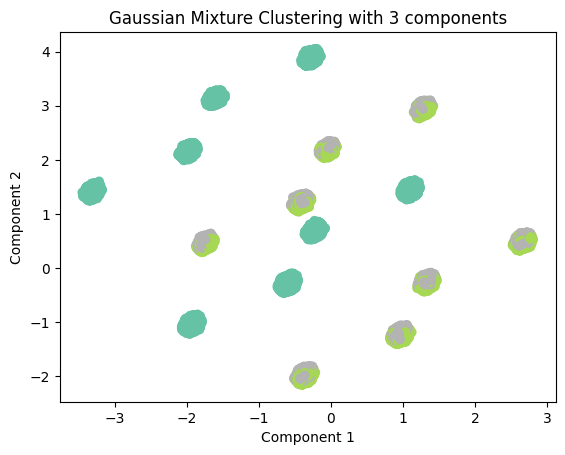

In [4]:
# Phương pháp Elbow để xác định số cụm tối ưu
inertia = []
for k in range(1, 11):  # từ 1 đến 10 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)  # Đảm bảo tính lặp lại kết quả
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), inertia)
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Chọn số cụm tối ưu dựa trên kết quả Elbow
optimal_k = int(input("\nNhập số cụm tối ưu: "))

# Thực hiện phân cụm với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced_PCA)

kmeans = KMeans(n_clusters=8, max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(f"Thuật toán hội tụ sau {kmeans.n_iter_} lần cập nhật.")

# Trực quan hóa các cụm trong không gian 2D (giả sử dữ liệu có thể giảm xuống 2 chiều)
plt.scatter(X_reduced_PCA[:, 0], X_reduced_PCA[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-Means Clustering with {optimal_k} clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

print(f"\n➡️ Tiến hành phân cụm GMM với {optimal_k} cụm...")

# Khởi tạo mô hình GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)

# Fit mô hình với dữ liệu đã chuẩn hóa (hoặc PCA giảm chiều tùy ý bạn)
gmm_labels = gmm.fit_predict(X_scaled)

# In log-likelihood và số vòng lặp hội tụ
print(f"GMM hội tụ sau {gmm.n_iter_} vòng lặp.")
print(f"Log-likelihood: {gmm.lower_bound_:.2f}")

# Trực quan hóa các cụm trong không gian 2D
plt.scatter(X_reduced_PCA[:, 0], X_reduced_PCA[:, 1], c=gmm_labels, cmap='Set2')
plt.title(f'Gaussian Mixture Clustering with {optimal_k} components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Bắt đầu mô hình LinearSVC...

=== Kết quả trên DỮ LIỆU: Gốc ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       15654       |    3252     |
|    Thực tế: Bị    |       5277        |    7488     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     18906 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.59     │       0.64 │     12765 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          

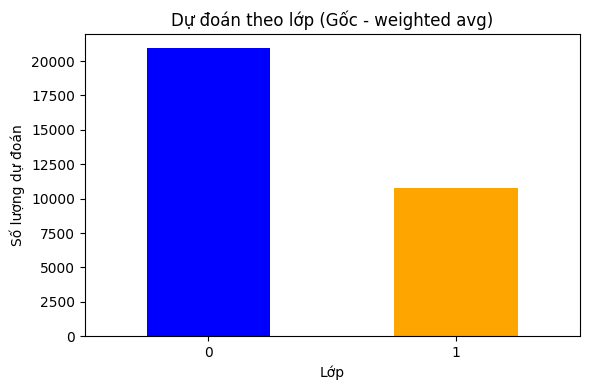


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       23648       |    4839     |
|    Thực tế: Bị    |       7875        |    11145    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     28487 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.59     │       0.64 │     19020 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     47507 │
├──────────────┼─────────────┼────────

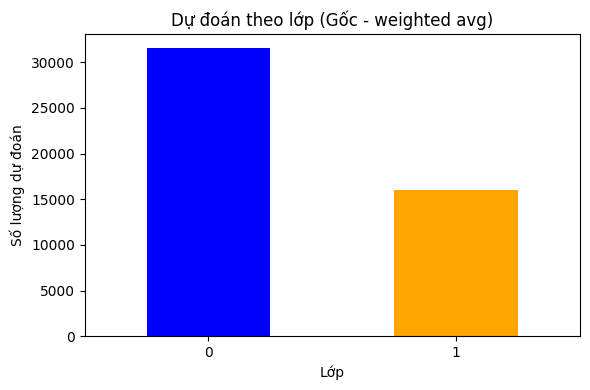


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       31542       |    6469     |
|    Thực tế: Bị    |       10432       |    14899    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     38011 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.59     │       0.64 │     25331 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     63342 │
├──────────────┼─────────────┼────────

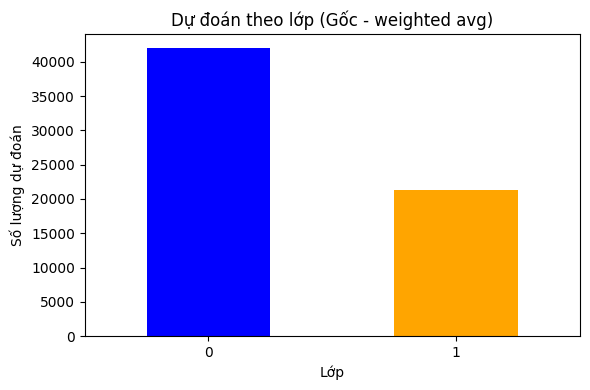


=== Kết quả trên DỮ LIỆU: Giảm chiều PCA ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       15696       |    3210     |
|    Thực tế: Bị    |       5408        |    7357     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.74        │ 0.83     │       0.78 │     18906 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.58     │       0.63 │     12765 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │    

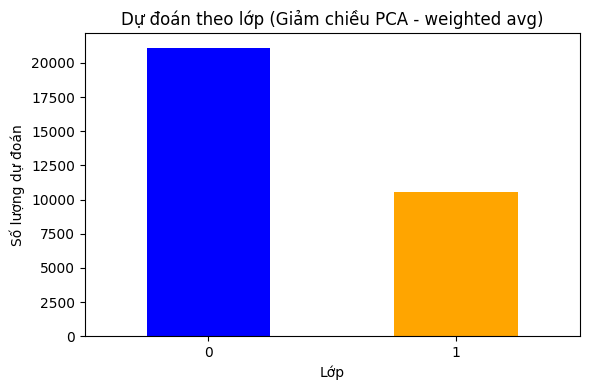


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       23716       |    4771     |
|    Thực tế: Bị    |       8107        |    10913    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     28487 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.57     │       0.63 │     19020 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     47507 │
├──────────────┼─────────────┼────────

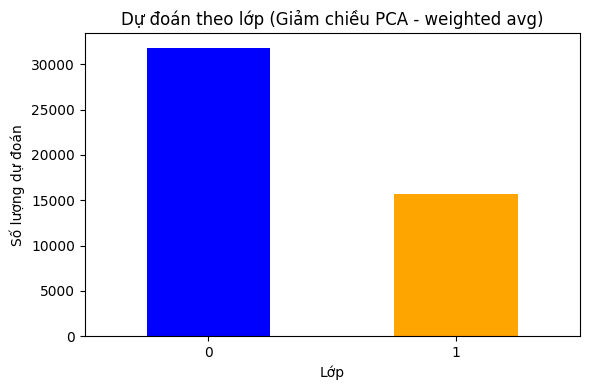


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       31613       |    6398     |
|    Thực tế: Bị    |       10716       |    14615    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     38011 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.58     │       0.63 │     25331 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     63342 │
├──────────────┼─────────────┼────────

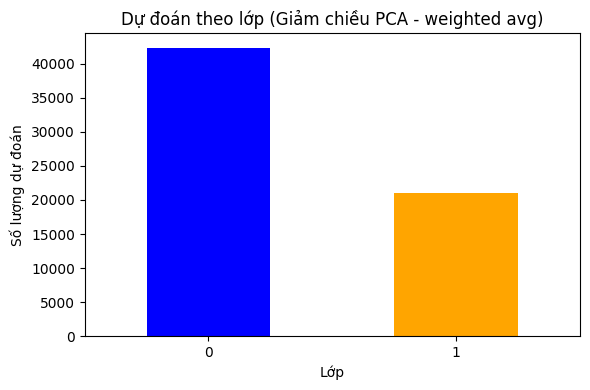


=====Kết thúc mô hình=====
Bắt đầu mô hình Logistic Regression...

=== Kết quả trên DỮ LIỆU: Gốc ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       15607       |    3299     |
|    Thực tế: Bị    |       5222        |    7543     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     18906 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.59     │       0.64 │     12765 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 

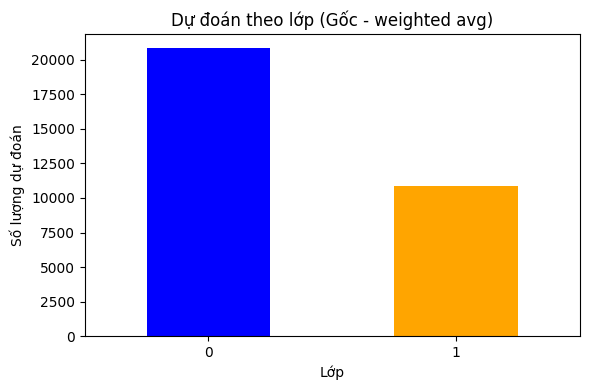


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       23575       |    4912     |
|    Thực tế: Bị    |       7789        |    11231    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     28487 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.59     │       0.64 │     19020 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     47507 │
├──────────────┼─────────────┼────────

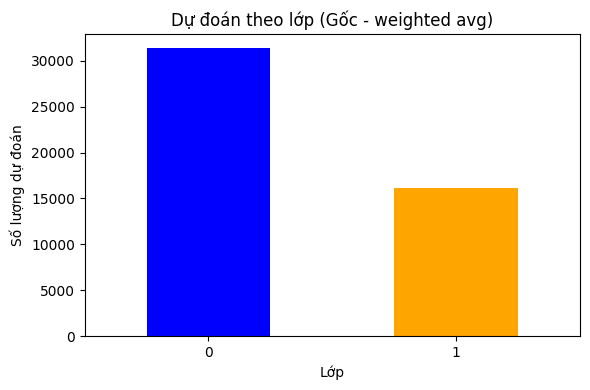


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       31434       |    6577     |
|    Thực tế: Bị    |       10335       |    14996    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     38011 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.70        │ 0.59     │       0.64 │     25331 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     63342 │
├──────────────┼─────────────┼────────

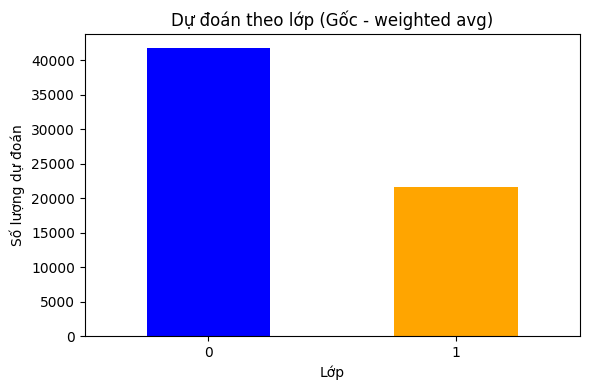


=== Kết quả trên DỮ LIỆU: Giảm chiều PCA ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       15635       |    3271     |
|    Thực tế: Bị    |       5334        |    7431     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.78 │     18906 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.69        │ 0.58     │       0.63 │     12765 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │    

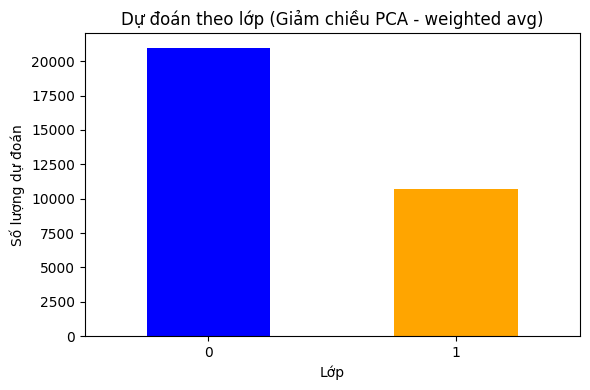


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       23642       |    4845     |
|    Thực tế: Bị    |       8008        |    11012    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     28487 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.69        │ 0.58     │       0.63 │     19020 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     47507 │
├──────────────┼─────────────┼────────

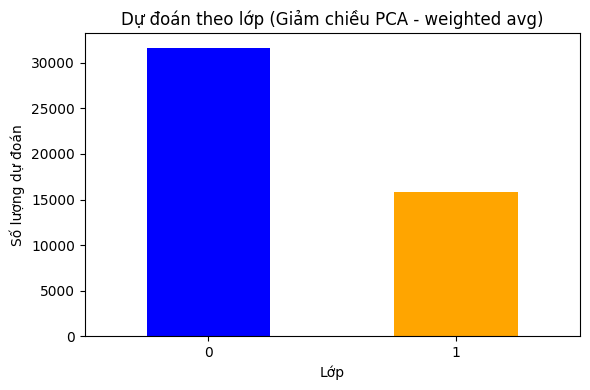


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       31488       |    6523     |
|    Thực tế: Bị    |       10589       |    14742    |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.83     │       0.79 │     38011 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.69        │ 0.58     │       0.63 │     25331 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.73 │     63342 │
├──────────────┼─────────────┼────────

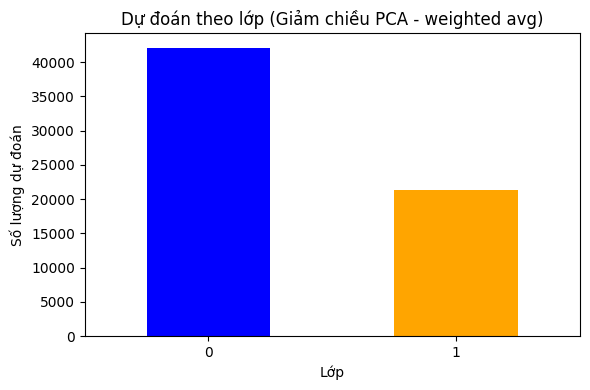


=====Kết thúc mô hình=====
Bắt đầu mô hình KNN

=== Kết quả trên DỮ LIỆU: Gốc ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       15911       |    2995     |
|    Thực tế: Bị    |       7666        |    5099     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.67        │ 0.84     │       0.75 │     18906 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.63        │ 0.40     │       0.49 │     12765 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │     

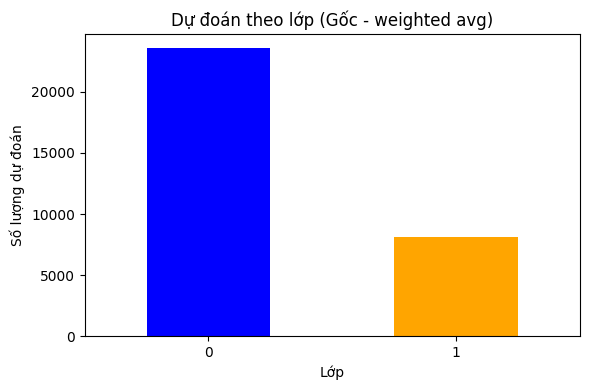


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       23982       |    4505     |
|    Thực tế: Bị    |       11544       |    7476     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.68        │ 0.84     │       0.75 │     28487 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.62        │ 0.39     │       0.48 │     19020 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.66 │     47507 │
├──────────────┼─────────────┼────────

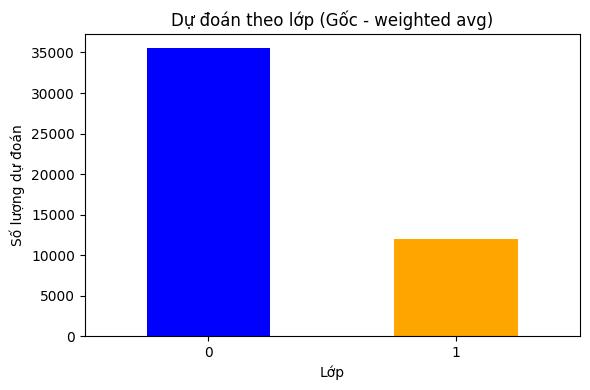


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       31945       |    6066     |
|    Thực tế: Bị    |       15444       |    9887     |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.67        │ 0.84     │       0.75 │     38011 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.62        │ 0.39     │       0.48 │     25331 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.66 │     63342 │
├──────────────┼─────────────┼────────

In [ ]:
# List tỷ lệ chia
ratios = [0.2, 0.3, 0.4]  # tương ứng: 4:1, 7:3, 6:4
ratio_labels = ['4:1 (80:20)', '7:3 (70:30)', '6:4 (60:40)']

# Dữ liệu cần thử (gốc và PCA)
datasets = {
    'Gốc': X_scaled,
    'Giảm chiều PCA': X_reduced_PCA
}
while True:
    method = input("\nChọn mô hình để chạy (1 = LinearSVC, 2 = Logistic Regression, Else = KNN, 0 = Thoát): ")
    
    if method == '0':
        break
    
    if method == '1':
        print("\nBắt đầu mô hình LinearSVC...")
    elif method == '2':
        print("\nBắt đầu mô hình Logistic Regression...")
    else: print("\nBắt đầu mô hình KNN")
    
    for data_label, X in datasets.items():
        print(f"\n=== Kết quả trên DỮ LIỆU: {data_label} ===\n")
        for ratio, label in zip(ratios, ratio_labels):
            print(f"\n➡️  Tỉ lệ train:test = {label}")
            
            # Chia dữ liệu
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=ratio, random_state=42
            )

            # Huấn luyện
            if method == '1':
                clf = LinearSVC(max_iter=10000)
            
            elif method == '2':
                clf = LogisticRegression(max_iter=1000, solver='lbfgs')
            
            else:
                clf = KNeighborsClassifier(n_neighbors=5)
                
            clf.fit(X_train, y_train)

            # Dự đoán
            y_pred = clf.predict(X_test)

            # Ma trận nhầm lẫn
            cm = confusion_matrix(y_test, y_pred)
            headers = ["", "Dự đoán: Không bị", "Dự đoán: Bị"]
            table = [
                ["Thực tế: Không bị", cm[0][0], cm[0][1]],
                ["Thực tế: Bị",        cm[1][0], cm[1][1]]
            ]
            print("\nMa trận nhầm lẫn (Tập test):")
            print(tabulate(table, headers=headers, tablefmt="pretty"))

            # Báo cáo phân loại
            report_dict = classification_report(y_test, y_pred, output_dict=True)
            table = []
            total_support = len(y_test)
            for label, metrics in report_dict.items():
                if isinstance(metrics, dict):
                    row = [label]
                    row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
                    table.append(row)
                elif label == "accuracy":
                    table.append(["accuracy", "", "", f"{metrics:.2f}", f"{total_support}"])

            headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
            print("\nKết quả trên tập test:")
            print(tabulate(table, headers=headers, tablefmt="fancy_grid"))
            
            # Ma trận nhầm lẫn cho tập huấn luyện
            y_train_pred = clf.predict(X_train)
            cm_train = confusion_matrix(y_train, y_train_pred)
            headers = ["", "Dự đoán: Không bị", "Dự đoán: Bị"]
            table_train = [
                ["Thực tế: Không bị", cm_train[0][0], cm_train[0][1]],
                ["Thực tế: Bị",        cm_train[1][0], cm_train[1][1]]
            ]
            print("\nMa trận nhầm lẫn (Tập huấn luyện):")
            print(tabulate(table_train, headers=headers, tablefmt="pretty"))
        

            # Báo cáo phân loại cho tập huấn luyện
            train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
            train_table = []
            train_total_support = len(y_train)
            for label, metrics in train_report_dict.items():
                if isinstance(metrics, dict):
                    row = [label]
                    row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
                    train_table.append(row)
                elif label == "accuracy":
                    train_table.append(["accuracy", "", "", f"{metrics:.2f}", f"{train_total_support}"])

            train_headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
            print("\nKết quả trên tập huấn luyện:")
            print(tabulate(train_table, headers=train_headers, tablefmt="fancy_grid"))
            
            # Đánh giá overfitting
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            print(f"\nAccuracy trên tập huấn luyện: {train_accuracy:.4f}")
            print(f"Accuracy trên tập kiểm tra: {accuracy_score(y_test, y_pred):.4f}")
            if train_accuracy > accuracy_score(y_test, y_pred):
                print("Có dấu hiệu overfitting!")
            else: print("Không có dấu hiệu overfitting")

            # Biểu đồ số lượng dự đoán theo lớp
            class_counts = pd.Series(y_pred).value_counts()
            plt.figure(figsize=(6, 4))
            class_counts.plot(kind='bar', color=['blue', 'orange'])
            plt.title(f'Dự đoán theo lớp ({data_label} - {label})')
            plt.xlabel('Lớp')
            plt.ylabel('Số lượng dự đoán')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()        
    print("\n=====Kết thúc mô hình=====")

Số mẫu train: 95013
Số mẫu test: 63342
Hệ số tương quan giữa thực tế và dự đoán: 0.42569404114483855


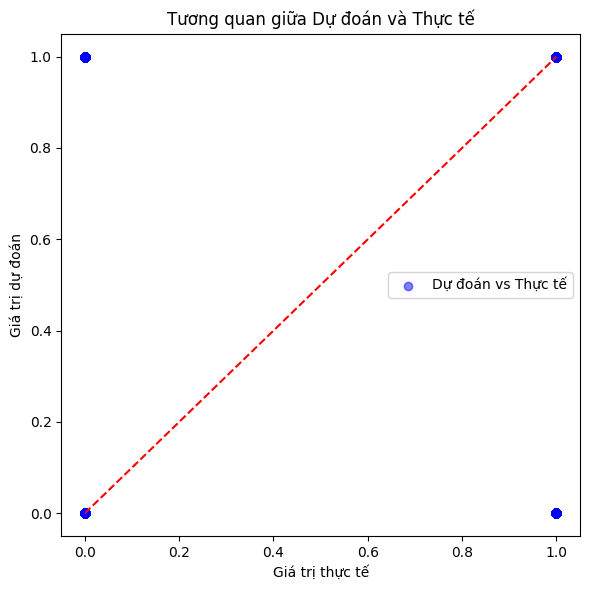

In [ ]:
# Trực quan hóa tương quan giữa thực tế và dự đoán
print(f"Số mẫu train: {len(y_train)}")
print(f"Số mẫu test: {len(y_test)}")
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f'Hệ số tương quan giữa thực tế và dự đoán: {correlation}')
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Dự đoán vs Thực tế')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Tương quan giữa Dự đoán và Thực tế')
plt.legend()
plt.tight_layout()
plt.show()